Text(0.5, 1.0, 'Distance transform image')

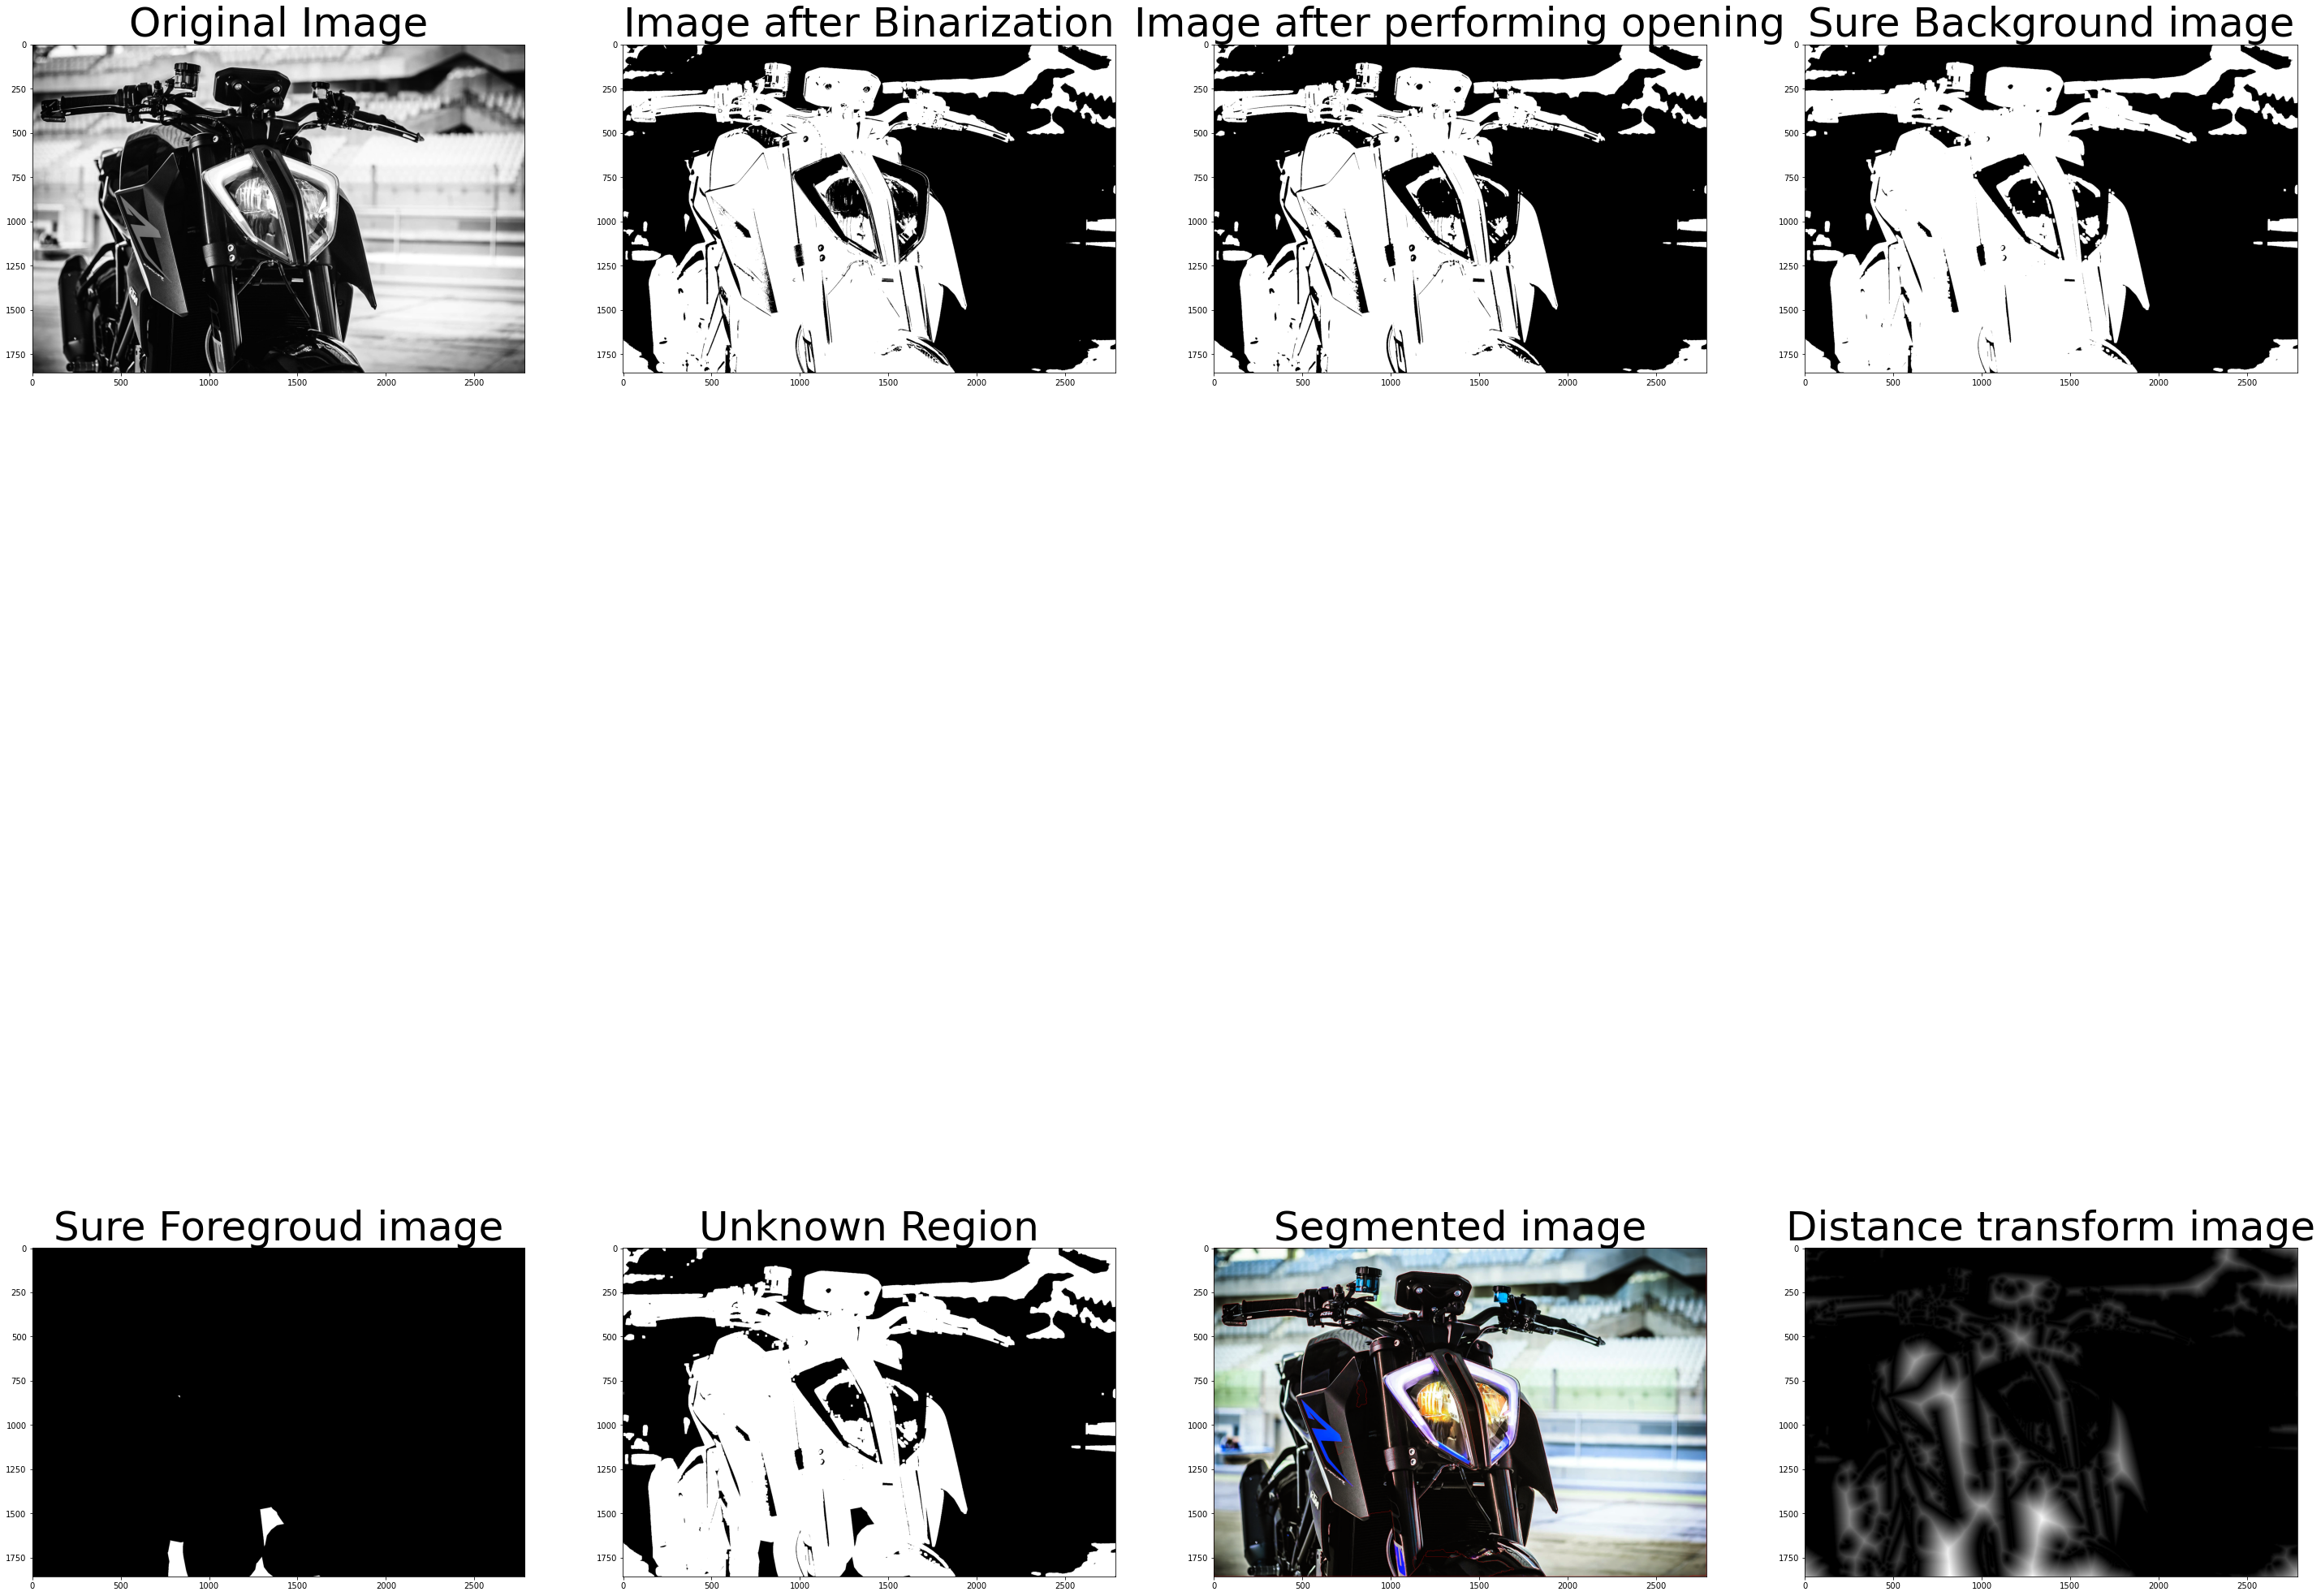

In [4]:
#Watershed Segmentation
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('img2.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#Step 1
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

#Step 2
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

#Step 3
# sure background area
#The region which is near to the centre of the object is foreground
#The region which is far from the centre of the object is background
sure_bg = cv.dilate(opening,kernel,iterations=3)
#plt.subplot(124),plt.imshow(sure_bg, 'gray')

# Finding sure foreground area
#Euclidean distance to the closest zero (i.e., background pixel) for each of the foreground pixels.

dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)#here 5 is mask size
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
#plt.subplot(125),plt.imshow(sure_fg, 'gray')

#Step4
# Finding unknown region (This is the boundary of touching coins our watershed alg will find theboundary )
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
#plt.subplot(224),plt.imshow(sure_bg, 'gray')

#Step5
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)# cv.connectedComponents().
#It labels background of the image with 0, then other objects are labelled with integers starting from 1.
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
#plt.subplot(126),plt.imshow(img, 'gray')

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(50, 50))
ax[0, 0].imshow(gray, "gray")

ax[0, 0].set_title('Original Image',fontsize = 50)
ax[0, 1].imshow(thresh, "gray")
ax[0, 1].set_title('Image after Binarization',fontsize = 50)
ax[0, 2].imshow(opening, "gray")
ax[0, 2].set_title('Image after performing opening',fontsize = 50)
ax[0, 3].imshow(sure_bg, "gray")
ax[0, 3].set_title('Sure Background image',fontsize = 50)
ax[1, 0].imshow(sure_fg, "gray")
ax[1, 0].set_title('Sure Foregroud image',fontsize = 50)
ax[1, 1].imshow(unknown, "gray")
ax[1, 1].set_title('Unknown Region',fontsize = 50)
ax[1, 2].imshow(img, "gray")
ax[1, 2].set_title('Segmented image',fontsize = 50)

ax[1, 3].imshow(dist_transform, "gray")
ax[1, 3].set_title('Distance transform image',fontsize = 50)

